In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression  
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [2]:
# Bộ dữ liệu mô phỏng về chi tiêu kỳ nghỉ của 26 khách hàng.
# Observation: số thứ tự được gán cho mỗi khách hàng, từ 1 đến 26
# Age: tuổi của khách hàng (tính bằng năm)
# Expenditures: chi tiêu trung bình hàng ngày trong kỳ nghỉ
df_1 = pd.DataFrame({
    "Observation": list(range(1, 27)),
    "Age": [49, 15, 43, 45, 40, 35, 42, 38, 46, 30, 52, 55, 42, 25, 35, 35, 35, 27, 48, 37, 45, 19, 57, 55, 34, 39],
    "Expenditures": [95, 104, 91, 98, 94, 107, 96, 108, 98, 108, 101, 89, 96, 105, 107, 106, 105, 105, 97, 109, 94, 103, 103, 94, 108, 108]
})
print(df_1.to_string(index=False))

 Observation  Age  Expenditures
           1   49            95
           2   15           104
           3   43            91
           4   45            98
           5   40            94
           6   35           107
           7   42            96
           8   38           108
           9   46            98
          10   30           108
          11   52           101
          12   55            89
          13   42            96
          14   25           105
          15   35           107
          16   35           106
          17   35           105
          18   27           105
          19   48            97
          20   37           109
          21   45            94
          22   19           103
          23   57           103
          24   55            94
          25   34           108
          26   39           108


#### Bài tập 1:

#### Bộ dữ liệu `df_1` là một bộ dữ liệu mô phỏng về chi tiêu kỳ nghỉ của 26 khách hàng. Bộ dữ liệu bao gồm các quan sát về tuổi của khách hàng và chi tiêu trung bình hàng ngày trong kỳ nghỉ.

(a) Vẽ hai biểu đồ `histogram`, một cho "chi tiêu" (`Expenditures`) và một cho "tuổi" (`Age`). Đồng thời, tạo biểu đồ phân tán (`scatter diagram`) với "chi tiêu" trên trục tung và "tuổi" trên trục hoành.

(b) Đề xuất một phương pháp phân tích bộ dữ liệu này để hỗ trợ công ty du lịch đưa ra các đề xuất phù hợp cho khách hàng trong tương lai.

#### Biểu đồ phân tán có thể chỉ ra sự khác biệt giữa các nhóm khách hàng. Nhóm khách hàng trẻ tuổi có thể chi tiêu nhiều hơn so với nhóm khách hàng lớn tuổi. Chi tiêu có xu hướng tăng theo độ tuổi đối với nhóm khách hàng trẻ, trong khi xu hướng này ít rõ ràng hơn đối với nhóm khách hàng lớn tuổi.

(c) Tính giá trị trung bình mẫu của "chi tiêu" của tất cả 26 khách hàng.

(d) Tính hai giá trị trung bình mẫu của "chi tiêu": một cho nhóm khách hàng có độ tuổi từ 40 trở lên và một cho nhóm khách hàng có độ tuổi dưới 40.

(e) Bạn sẽ dự đoán chi tiêu hàng ngày cho một khách hàng mới 50 tuổi là bao nhiêu? Và cho một khách hàng 25 tuổi thì sao?

#### Bài làm

(a) Vẽ hai biểu đồ histogram, một cho "chi tiêu" (Expenditures) và một cho "tuổi" (Age). Đồng thời, tạo biểu đồ phân tán (scatter diagram) với "chi tiêu" trên trục tung và "tuổi" trên trục hoành.

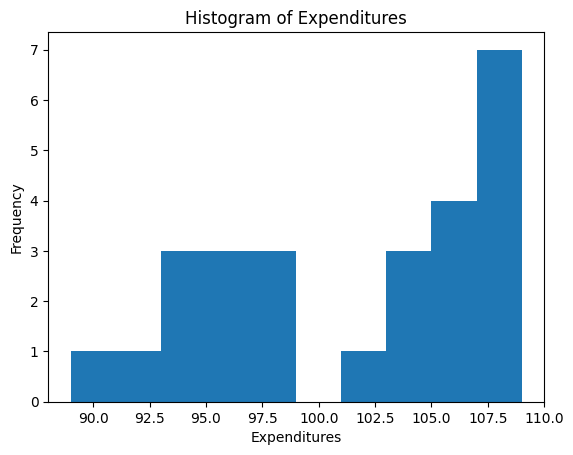

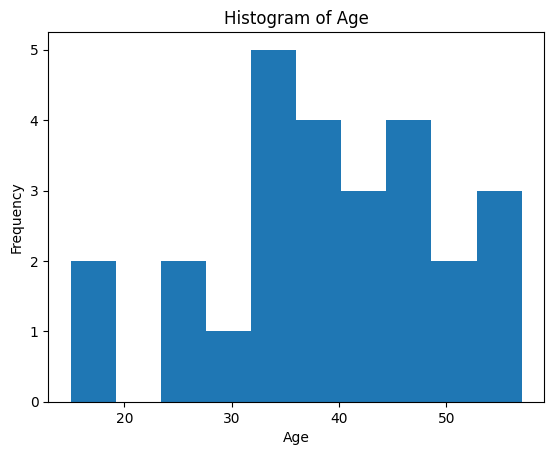

Text(0.5, 1.0, 'Scatter diagram of Age and Expenditures')

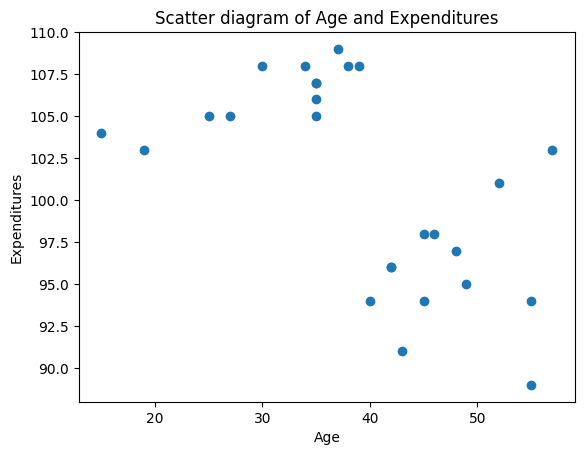

In [3]:
plt.hist(df_1['Expenditures'])
plt.xlabel('Expenditures')
plt.ylabel('Frequency')
plt.title('Histogram of Expenditures')
plt.show()
plt.hist(df_1['Age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()
plt.scatter(df_1['Age'], df_1['Expenditures'])
plt.xlabel('Age')
plt.ylabel('Expenditures')
plt.title('Scatter diagram of Age and Expenditures')

(b) Đề xuất một phương pháp phân tích bộ dữ liệu này để hỗ trợ công ty du lịch đưa ra các đề xuất phù hợp cho khách hàng trong tương lai.

#### Biểu đồ phân tán có thể chỉ ra sự khác biệt giữa các nhóm khách hàng. Nhóm khách hàng trẻ tuổi có thể chi tiêu nhiều hơn so với nhóm khách hàng lớn tuổi. Chi tiêu có xu hướng tăng theo độ tuổi đối với nhóm khách hàng trẻ, trong khi xu hướng này ít rõ ràng hơn đối với nhóm khách hàng lớn tuổi.

Phân tích Hồi quy:

Hồi quy tuyến tính đa biến: Ngoài tuổi, chúng ta có thể đưa thêm các biến độc lập khác như giới tính, thu nhập (nếu có), loại hình kỳ nghỉ ưa thích để xây dựng một mô hình dự đoán chi tiêu chính xác hơn.

Hồi quy phi tuyến: Nếu mối quan hệ giữa tuổi và chi tiêu không hoàn toàn tuyến tính, chúng ta có thể sử dụng các mô hình hồi quy phi tuyến như hồi quy đa thức hoặc hồi quy cây quyết định.


(c) Tính giá trị trung bình mẫu của "chi tiêu" của tất cả 26 khách hàng.

In [4]:
# Calculate the sample mean of Expenditures
mean_expenditures = df_1['Expenditures'].mean()
# Print out the mean_expenditures
print(mean_expenditures)

101.11538461538461


(d) Tính hai giá trị trung bình mẫu của "chi tiêu": một cho nhóm khách hàng có độ tuổi từ 40 trở lên và một cho nhóm khách hàng có độ tuổi dưới 40.

In [5]:
# Initialize lists to hold expenditures
Over40 = []
Under40 = []

# Iterate through the DataFrame
for index, row in df_1.iterrows():
    if row['Age'] >= 40:
        Over40.append(row['Expenditures'])
    else:
        Under40.append(row['Expenditures'])

# Calculate the means
Mean_Over40 = sum(Over40) / len(Over40) if Over40 else 0
Mean_Under40 = sum(Under40) / len(Under40) if Under40 else 0

# Print the results
print("Mean Expenditures for Age 40 and over:", Mean_Over40)
print("Mean Expenditures for Age under 40:", Mean_Under40)

Mean Expenditures for Age 40 and over: 95.84615384615384
Mean Expenditures for Age under 40: 106.38461538461539


(e) Bạn sẽ dự đoán chi tiêu hàng ngày cho một khách hàng mới 50 tuổi là bao nhiêu? Và cho một khách hàng 25 tuổi thì sao?

In [6]:
X_Age = df_1[['Age']]
y_Expenditures = df_1['Expenditures']

#Train the model
Ex1_Model = LinearRegression()
Ex1_Model.fit(X_Age, y_Expenditures)

#Create new customers
New_Customers= pd.DataFrame({'Age': [50, 25]})

# Make predictions
Ex1_Predictions = Ex1_Model.predict(New_Customers)

# Print the results
print("Predicted daily expenditure for a 50-year-old customer:", Ex1_Predictions[0])
print("Predicted daily expenditure for a 25-year-old customer:", Ex1_Predictions[1])

Predicted daily expenditure for a 50-year-old customer: 97.56130312461775
Predicted daily expenditure for a 25-year-old customer: 105.90120553977466


#### Bài tập 2:

#### Một phép biến đổi dữ liệu của $x_i$ và $y_i$ (như việc lấy logarit) sẽ thay đổi cách diễn giải của tham số độ dốc $\beta$.

(a) Chứng minh rằng trong mô hình hồi quy $\log(y_i) = \alpha + \beta \log(x_i) + \varepsilon_i$, độ co giãn (elasticity) của $y$ đối với $x$ bằng $\beta$ (tức là, không phụ thuộc vào giá trị của $x_i$ và $y_i$).

(b) Xác định độ co giãn của $y$ đối với $x$ trong mô hình $y_i = \alpha + \beta \log(x_i) + \varepsilon_i$.

(c) Xác định độ co giãn của $y$ đối với $x$ trong mô hình $\log(y_i) = \alpha + \beta x_i + \varepsilon_i$.

**Lưu ý**:
Như trong phần lớn các môn học, `log` viết tắt cho `logarit` tự nhiên, với cơ số $e \approx 2.71828$. Trên máy tính, thường được viết là $\ln(x)$, nhưng chúng ta sử dụng ký hiệu $\log(x)$. Đạo hàm của $\log(x)$, với cơ số $e$, là $1/x$.

#### Công thức tính độ co giãn:
$$
\text{elasticity} = \frac{\partial y_i}{\partial x_i} \times \frac{x_i}{y_i}
$$
Trong đó:
- $\frac{\partial y_i}{\partial x_i}$ là đạo hàm của $y_i$ theo $x_i$, biểu thị sự thay đổi của $y$ khi $x$ thay đổi.
- $\frac{x_i}{y_i}$ là tỷ lệ của $x_i$ với $y_i$.

#### Ví dụ về độ co giãn:
- $x_i = 20$ (nghìn đồng), $y_i = 500$ (triệu đồng)
- $\frac{\partial y_i}{\partial x_i} = -10$ (doanh thu giảm 10 triệu đồng khi giá tăng 1 nghìn đồng)

Tính độ co giãn:

$$
\text{elasticity} = \frac{\partial y_i}{\partial x_i} \times \frac{x_i}{y_i} = -10 \times \frac{20}{500} = -0.4
$$

Kết quả: Độ co giãn là $-0.4$, nghĩa là khi giá tăng 1%, doanh thu giảm 0.4%.

#### Bài làm

(a) Chứng minh rằng trong mô hình hồi quy $\log(y_i) = \alpha + \beta \log(x_i) + \varepsilon_i$, độ co giãn (elasticity) của $y$ đối với $x$ bằng $\beta$ (tức là, không phụ thuộc vào giá trị của $x_i$ và $y_i$).

**Mô hình:** $\log(y_i) = \alpha + \beta \log(x_i) + \varepsilon_i$
 
**Tính đạo hàm:**
 
Đạo hàm 2 vế ta có:

$\frac{1}{y_i}\frac{dy_i}{dx_i} =  \beta \frac{1}{x_i}$

Từ đó suy ra:

$\frac{dy_i}{dx_i} = \beta\frac{y_i}{x_i}$

**Tính độ co giãn:**

$\text{elasticity} = \frac{\partial y_i}{\partial x_i} \times \frac{x_i}{y_i} =  \beta \frac{y_i}{x_i} \times \frac{x_i}{y_i} =  \beta$ 

**Kết luận:** Độ co giãn của $y$ đối với $x$ trong mô hình này bằng chính hệ số $\beta$, và không phụ thuộc vào giá trị cụ thể của $x_i$ và $y_i$. Điều này có nghĩa là khi tăng $x$ lên $1\%$, thì $y$ sẽ tăng $\beta\%$   

(b) Xác định độ co giãn của $y$ đối với $x$ trong mô hình $y_i = \alpha + \beta \log(x_i) + \varepsilon_i$.

**Mô hình:** $y_i = \alpha + \beta \log(x_i) + \varepsilon_i$

**Tính đạo hàm:**

$\frac{dy_i}{dx_i} = \frac{\beta}{x_i}$


**Tính độ co giãn:**

$\text{elasticity} = \frac{\partial y_i}{\partial x_i} \times \frac{x_i}{y_i} = \frac{\beta}{x_i} \times \frac{x_i}{y_i} =  \frac{\beta}{y_i}$ 

**Kết luận:** Độ co giãn của $y$ đối với $x$ trong mô hình này bằng $\frac{\beta}{y_i}$. Trong trường hợp này, độ co giãn phụ thuộc vào cả hệ số $\beta$ và giá trị của $y_i$ 

(c) Xác định độ co giãn của $y$ đối với $x$ trong mô hình $\log(y_i) = \alpha + \beta x_i + \varepsilon_i$.

**Mô hình:** $\log(y_i) = \alpha + \beta x_i + \varepsilon_i$

**Tính đạo hàm:**

$\frac{1}{y_i}\frac{dy_i}{dx_i} = \beta   \Leftrightarrow \frac{dy_i}{dx_i} = \beta y_i$

**Tính độ co giãn:**

$\text{elasticity} = \frac{\partial y_i}{\partial x_i} \times \frac{x_i}{y_i} = \beta y_i \frac{x_i}{y_i} = \beta x_i$

**Kết luận:** Độ co giãn của $y$ đối với $x$ trong mô hình này bằng $\beta x_i$ Trong trường hợp này, độ co giãn phụ thuộc vào cả hệ số $\beta$ và giá trị của $x_i$ 

In [7]:
# Thời gian về đích ở nội dung điền kinh 100 mét dành cho nam tại Thế vận hội Olympic từ 1948-2004.
# Game: số thứ tự của kỳ Thế vận hội (1-15)
# Year: năm diễn ra Thế vận hội Olympic (1948-2004)
# Winning time men: thời gian về đích ở nội dung điền kinh 100 mét dành cho nam (tính bằng giây)
df_2 = pd.DataFrame({
    "Game": list(range(1, 16)),
    "Year": [1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004],
    "Winning time men": [10.3, 10.4, 10.5, 10.2, 10.0, 9.95, 10.14, 10.06, 10.25, 9.99, 9.92, 9.96, 9.84, 9.87, 9.85]
})
print(df_2.to_string(index=False))

 Game  Year  Winning time men
    1  1948             10.30
    2  1952             10.40
    3  1956             10.50
    4  1960             10.20
    5  1964             10.00
    6  1968              9.95
    7  1972             10.14
    8  1976             10.06
    9  1980             10.25
   10  1984              9.99
   11  1988              9.92
   12  1992              9.96
   13  1996              9.84
   14  2000              9.87
   15  2004              9.85


#### Bài tập 3:

#### Bộ dữ liệu `df_2` chứa thời gian về đích ở nội dung điền kinh 100 mét dành cho nam tại Thế vận hội Olympic từ năm 1948 đến 2004. Các năm từ 1948-2004 được chuyển đổi thành số thứ tự của kỳ Thế vận hội (Game) từ 1 đến 15 để đơn giản hóa việc tính toán. Một mô hình hồi quy đơn giản cho xu hướng trong thời gian về đích được thể hiện bằng: $W_i = \alpha + \beta G_i + \varepsilon_i$, trong đó $W_i$ là "thời gian về đích" và $G_i$ là số thứ tự của kỳ Thế vận hội.

(a) Tính toán $a$ và $b$ (hệ số hồi quy), và xác định giá trị của $R^2$ và $s$ (độ lệch chuẩn của sai số).

(b) Bạn có tự tin vào khả năng dự đoán của mô hình này không? Hãy giải thích lý do.

(c) Dự đoán thời gian về đích cho các năm 2008, 2012, và 2016. So sánh dự đoán của bạn với thời gian về đích thực tế nếu có.

#### Bài làm

(a) Tính toán $a$ và $b$ (hệ số hồi quy), và xác định giá trị của $R^2$ và $s$ (độ lệch chuẩn của sai số).

In [15]:
#Train the model
Ex2_Model = Ridge(alpha = 1.0)
Ex2_Model.fit(df_2[["Game"]], df_2["Winning time men"])

#Make predictions and calculate s
Ex2_Predictions = Ex2_Model.predict(df_2[["Game"]])
MSE = mean_squared_error(df_2["Winning time men"], Ex2_Predictions)
s = np.sqrt(MSE)

print("Hệ số hồi quy (b):", Ex2_Model.coef_[0])
print("Hệ số tự do (a):", Ex2_Model.intercept_)
print("Giá trị của R:", Ex2_Model.score(df_2[["Game"]], df_2["Winning time men"]))
print("Giá trị của s:", s)

Hệ số hồi quy (b): -0.03786476868327405
Hệ số tự do (a): 10.384918149466193
Giá trị của R: 0.6733643319856647
Giá trị của s: 0.11434600138833825


In [ ]:
(b) Bạn có tự tin vào khả năng dự đoán của mô hình này không? Hãy giải thích lý do.

**Không**. Trên thực tế, kết quả dự đoán với số liệu thực tế thì không thể nào giống nhau chính xác hoàn toàn. Theo mô hình này, sẽ tới một thời điểm mà thời gian chạy sẽ bé hơn so với sức chạy thực tế của con người. 

(c) Dự đoán thời gian về đích cho các năm 2008, 2012, và 2016. So sánh dự đoán của bạn với thời gian về đích thực tế nếu có.

In [9]:
#Create new games
New_Predict= pd.DataFrame({'Game': [15, 16, 17]})

# Make predictions
Ex2_Predictions = Ex2_Model.predict(New_Predict)

# Print the results
print("Thời gian về đích cho năm 2008 là:", Ex2_Predictions[0])
print("Thời gian về đích cho năm 2012 là:", Ex2_Predictions[1])
print("Thời gian về đích cho năm 2016 là:", Ex2_Predictions[2])

Hệ số hồi quy (b): -0.03786476868327405
Hệ số tự do (a): 10.384918149466193
Thời gian về đích cho năm 2008 là: 9.816946619217083
Thời gian về đích cho năm 2012 là: 9.779081850533808
Thời gian về đích cho năm 2016 là: 9.741217081850534


Kết quả thực tế là:
* 2008: 9.69 giây
* 2012: 9.63 giây
* 2016: 9.81 giây

Trên thực tế dữ liệu dự đoán không hoàn toàn chính xác nhưng cũng xấp xỉ gần bằng so với số liệu thực tế.

#### Bài tập 4:

#### Xét tình huống biến số $x$ được quan sát với sai số đo lường (measurement error), điều này khá phổ biến đối với các biến kinh tế vĩ mô phức tạp như thu nhập quốc dân.

#### Giả sử $x^*$ là biến kinh tế thực sự nhưng không được quan sát, và quá trình tạo dữ liệu được cho bởi $y_i = \alpha + \beta x_i^* + \varepsilon_i^*$, trong đó $x_i^*$ và $\varepsilon_i^*$ không tương quan.

#### Các giá trị $x$ quan sát được là $x_i = x_i^* + v_i$, với sai số đo lường $v_i$ không tương quan với $x_i^*$ và $\varepsilon_i^*$. Tỷ lệ tín hiệu trên nhiễu (signal-to-noise ratio) được định nghĩa là $SN = \frac{\sigma_{x^*}^2}{\sigma_v^2}$, trong đó $\sigma_{x^*}^2$ là phương sai (variance) của $x^*$ và $\sigma_v^2$ là phương sai của $v$.

#### Mô hình hồi quy ước lượng là $y_i = \alpha + \beta x_i + \varepsilon_i$, và chúng ta xem xét ước lượng bình phương tối thiểu $b$ của $\beta$ ($b$ là ước lượng, $\beta$ là hệ số thực).

(a) Bạn có nghĩ rằng giá trị của $b$ phụ thuộc vào phương sai của sai số đo lường không? Tại sao?

(b) Chứng minh rằng $b = \beta + \frac{\sum_{i=1}^{n}(x_i - \bar{x})(\varepsilon_i - \bar{\varepsilon})}{\sum_{i=1}^{n}(x_i - \bar{x})^2}$.

(c) Chứng minh rằng $\varepsilon_i = \varepsilon_i^* - \beta v_i$.

(d) Chứng minh rằng hiệp phương sai (covariance) giữa $x_i$ và $\varepsilon_i$ bằng $- \beta \sigma_v^2$.

(e) Chứng minh rằng với cỡ mẫu lớn $n$, ta có $b - \beta \approx - \beta \frac{\sigma_v^2}{\sigma_{x^*}^2 + \sigma_v^2}$.

(f) Tính xấp xỉ độ chệch (bias) $b - \beta$ cho $\beta = 1$ trong các trường hợp $SN = 1$, $SN = 3$, và $SN = 10$.

#### Bài làm

(a) Bạn có nghĩ rằng giá trị của $b$ phụ thuộc vào phương sai của sai số đo lường không? Tại sao?

Giá trị của $b$ sẽ phụ thuộc vào phương sai của sai số đo lường $({\sigma_v^2})$. Vì sai số đo lường làm nhiễu biến giải thích $x$, dẫn đến việc ước lượng hệ số hồi quy $\beta$ bị ảnh hưởng. Khi phương sai của sai số đo lường tăng lên, mức độ nhiễu cũng tăng lên, làm giảm độ chính xác của ước lượng $b$.

(b) Chứng minh rằng $b = \beta + \frac{\sum_{i=1}^{n}(x_i - \bar{x})(\varepsilon_i - \bar{\varepsilon})}{\sum_{i=1}^{n}(x_i - \bar{x})^2}$.

**Chứng minh:**

Công thức ước lượng bình phương tối thiểu cho hệ số hồi quy là:

$b = \frac{ \sum\nolimits_{i=1}^{n}(x_i- \overline{x})( y_i-\overline{y})}{\sum\nolimits_{i=1}^{n}(x_i- \overline{x})^2 }$

Thay $y_i =  \alpha+\beta{x_i^*}+{\varepsilon_i^*}$ vào công thức trên, ta được: 

$b = \frac{ \sum\nolimits_{i=1}^{n}(x_i- \overline{x})( \beta{x_i^*}+{\varepsilon_i^*}-\beta{\overline{x}_i^*}-{\overline{\varepsilon}^*})}{\sum\nolimits_{i=1}^{n}(x_i- \overline{x})^2 }$

Sau khi rút gọn và sắp xếp lại, ta có:

$b = \beta+\frac{ \sum\nolimits_{i=1}^{n}(x_i- \overline{x})( {\varepsilon_i^*}-{\overline{\varepsilon}^*})}{\sum\nolimits_{i=1}^{n}(x_i- \overline{x})^2 }$

Mà $\varepsilon_i =    {\varepsilon_i^*} - \beta v_i$ ((sẽ chứng minh ở câu (c)), nên:

$b = \beta + \frac{\sum_{i=1}^{n}(x_i - \bar{x})(\varepsilon_i - \bar{\varepsilon})}{\sum_{i=1}^{n}(x_i - \bar{x})^2}$

(c) Chứng minh rằng $\varepsilon_i = \varepsilon_i^* - \beta v_i$.

**Chứng minh:**

Từ phương trình mô hình hồi quy ước lượng: $y_i = \alpha + \beta x_i + \varepsilon_i$

Và phương trình mô hình dữ liệu thực tế: $y_i = \alpha + \beta x_i^* + \varepsilon_i^*$

Ta có:

$\beta x_i + \varepsilon_i = \beta x_i^* + \varepsilon_i^*$

Thay $x_i = x_i^* + v_i$ vào phương trình trên, ta được:

$\beta(x_i^* + v_i) + \varepsilon_i = \beta x_i^* + \varepsilon_i^*$

Rút gọn, ta có:

$\varepsilon_i = \varepsilon_i^* - \beta v_i$

(d) Chứng minh rằng hiệp phương sai (covariance) giữa $x_i$ và $\varepsilon_i$ bằng $- \beta \sigma_v^2$.

**Chứng minh:**

$Cov(x_i, \varepsilon_i) = E[(x_i-E[x_i])(\varepsilon_i -E[\varepsilon_i])]$

Thay $\varepsilon_i = \varepsilon_i^* - \beta v_i$ và sử dụng tính chất không tương quan giữa $x_i^*$, $e_i^*$, và $v_i$, ta có:

$Cov(x_i, \varepsilon_i) = E[(x_i^* + v_i - E[x_i^*])(-\beta v_i)] = -\beta E[v_i^2] = -\beta \sigma_v^2$

(e) Chứng minh rằng với cỡ mẫu lớn $n$, ta có $b - \beta \approx - \beta \frac{\sigma_v^2}{\sigma_{x^*}^2 + \sigma_v^2}$.

Từ kết quả ở (b):

$b - \beta = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(\varepsilon_i - 0)}{\sum_{i=1}^{n}(x_i - \bar{x})^2}$

Tính $\text{Cov}(x_i, \varepsilon_i)$ và $\text{Var}(x_i)$:

$\text{Cov}(x_i, \varepsilon_i) \approx -\beta \sigma_v^2$

$
\text{Var}(x_i) = \text{Var}(x^* + v) = \sigma_{x^*}^2 + \sigma_v^2
$

Vì vậy:

$
b - \beta \approx \frac{-\beta \sigma_v^2}{\sigma_{x^*}^2 + \sigma_v^2}
$

(f) Tính xấp xỉ độ chệch (bias) $b - \beta$ cho $\beta = 1$ trong các trường hợp $SN = 1$, $SN = 3$, và $SN = 10$.

Sử dụng kết quả ở câu (e) ta có: 

$b- \beta  \approx -\beta \frac{ \sigma_v^2 }{\sigma_{x^*}^2 + \sigma_v^2}$

Với $\beta = 1$, ta có:

$b-1 \approx - \frac{ \sigma_v^2 }{\sigma_{x^*}^2 + \sigma_v^2} = -\frac{1}{SN + 1} $

Với $SN = 1$ : $b - 1 \approx -\frac{1}{2}$

Với $SN = 3$ : $b - 1 \approx -\frac{1}{4}$

Với $SN = 10$ : $b - 1 \approx -\frac{1}{11}$

In [17]:
# Thời gian về đích ở nội dung điền kinh 100 mét dành cho nam và nữ tại Thế vận hội Olympic từ 1948-2004.
# Game: số thứ tự của kỳ Thế vận hội (1-15)
# Year: năm diễn ra Thế vận hội Olympic (1948-2004)
# Winning time men: thời gian về đích ở nội dung điền kinh 100 mét dành cho nam (tính bằng giây)
# Winning time women: thời gian về đích ở nội dung điền kinh 100 mét dành cho nữ (tính bằng giây)
df_3 = pd.DataFrame({
    "Game": list(range(1, 16)),
    "Year": [1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004],
    "Winning time men": [10.3, 10.4, 10.5, 10.2, 10.0, 9.95, 10.14, 10.06, 10.25, 9.99, 9.92, 9.96, 9.84, 9.87, 9.85],
    "Winning time women": [11.9, 11.5, 11.5, 11.0, 11.4, 11.08, 11.07, 11.08, 11.06, 10.97, 10.54, 10.82, 10.94, 10.75, 10.93]
})
print(df_3.to_string(index=False))

 Game  Year  Winning time men  Winning time women
    1  1948             10.30               11.90
    2  1952             10.40               11.50
    3  1956             10.50               11.50
    4  1960             10.20               11.00
    5  1964             10.00               11.40
    6  1968              9.95               11.08
    7  1972             10.14               11.07
    8  1976             10.06               11.08
    9  1980             10.25               11.06
   10  1984              9.99               10.97
   11  1988              9.92               10.54
   12  1992              9.96               10.82
   13  1996              9.84               10.94
   14  2000              9.87               10.75
   15  2004              9.85               10.93


#### Bài tập 5:

#### Bộ dữ liệu `df_3` chứa thời gian về đích ở nội dung điền kinh 100 mét dành cho nam và nữ tại Thế vận hội Olympic từ năm 1948 đến 2004. Dữ liệu bao gồm thời gian về đích của các vận động viên qua các kỳ Thế vận hội (1-15) trong giai đoạn này.

(a) Sử dụng một mô hình hồi quy tuyến tính với công thức $y_{\text{men}} = a_1 \times \text{Year} + b_1$ cho nam và $y_{\text{women}} = a_2 \times \text{Year} + b_2$ cho nữ. Dự đoán khi nào thời gian về đích của nam và nữ sẽ bằng nhau. Chứng minh rằng mô hình dự đoán thời gian về đích bằng nhau vào khoảng năm 2140.

(b) Sử dụng một mô hình hồi quy phi tuyến với hàm `log` theo công thức $\log(y_{\text{men}}) = a_3 \times \text{Year} + b_3$ cho nam và $\log(y_{\text{women}}) = a_4 \times \text{Year} + b_4$ cho nữ. Dự đoán khi nào thời gian về đích của nam và nữ sẽ bằng nhau. Chứng minh rằng mô hình này dự đoán thời gian bằng nhau vào khoảng năm 2192.

(c) Chứng minh rằng mô hình hồi quy tuyến tính dự đoán thời gian về đích bằng nhau ở mức xấp xỉ 8.53 giây.

(d) Đưa ra nhận xét về những kết quả này và mô hình hồi quy được sử dụng. Bạn có nghĩ rằng dự đoán của các mô hình này đáng tin cậy cho tương lai xa không? Tại sao?

#### Bài làm

(a) Sử dụng một mô hình hồi quy tuyến tính với công thức $y_{\text{men}} = a_1 \times \text{Year} + b_1$ cho nam và $y_{\text{women}} = a_2 \times \text{Year} + b_2$ cho nữ. Dự đoán khi nào thời gian về đích của nam và nữ sẽ bằng nhau. Chứng minh rằng mô hình dự đoán thời gian về đích bằng nhau vào khoảng năm 2140.

In [30]:
#Train the model
Ex3_men = LinearRegression()
Ex3_women = LinearRegression()

Ex3_men.fit(df_3[["Year"]], df_3["Winning time men"])
Ex3_women.fit(df_3[["Year"]], df_3["Winning time women"])

# Get a1,b1 and a2, b2 
a1, b1 = Ex3_men.coef_[0], Ex3_men.intercept_
a2, b2 = Ex3_women.coef_[0], Ex3_women.intercept_

#Calculate the prediction time
Year_equal = (b2 - b1) / (a1 - a2)
print(Year_equal.round())

2140.0


(b) Sử dụng một mô hình hồi quy phi tuyến với hàm `log` theo công thức $\log(y_{\text{men}}) = a_3 \times \text{Year} + b_3$ cho nam và $\log(y_{\text{women}}) = a_4 \times \text{Year} + b_4$ cho nữ. Dự đoán khi nào thời gian về đích của nam và nữ sẽ bằng nhau. Chứng minh rằng mô hình này dự đoán thời gian bằng nhau vào khoảng năm 2192.

#Get the data
log_ymen = np.log(df_3['Winning time men'])
log_ywomen = np.log(df_3['Winning time women'])

#Train the model
Ex3_men = LinearRegression()
Ex3_women = LinearRegression()

Ex3_men.fit(df_3[["Year"]], log_ymen)
Ex3_women.fit(df_3[["Year"]], log_ywomen)

# Get a3,b3 and a4, b4 
a3, b3 = Ex3_men.coef_[0], Ex3_men.intercept_
a4, b4 = Ex3_women.coef_[0], Ex3_women.intercept_

#Calculate the prediction time
Year_equal = (b4 - b3) / (a3 - a4)
print(Year_equal.round())

(c) Chứng minh rằng mô hình hồi quy tuyến tính dự đoán thời gian về đích bằng nhau ở mức xấp xỉ 8.53 giây.

In [32]:
#Create new year
New_Predict_year= pd.DataFrame({'Year': [Year_equal.round().reshape(1,-1)]})

Ex3_predictions_formen = Ex3_men.predict(New_Predict_year)
Ex3_predictions_forwomen = Ex3_women.predict(New_Predict_year)
print(Ex3_predictions_formen, Ex3_predictions_forwomen)

[8.524] [8.52259524]


Vậy mô hình hồi quy tuyến tính dự đoán thời gian về đích bằng nhau ở mức xấp xỉ 8.53 giây

(d) Đưa ra nhận xét về những kết quả này và mô hình hồi quy được sử dụng. Bạn có nghĩ rằng dự đoán của các mô hình này đáng tin cậy cho tương lai xa không? Tại sao?

Dừng như là những kết quả trên mang tính chính xác cao. Tuy nhiên nếu xét trong tương lai xa thì không. Bởi lẽ dữ liệu trên là quá ít để có thể dự đoán, trong tương lai xa còn phụ thuộc vào nhiều yếu tố khác nhau, chứ không thể nào dự đoán bởi kết quả trong quá khứ được.